# IBOV EDA and Prediction with AR Model

## The objective of this Notebook is creating a Model that tries to predict the closing of IBOV

## Importing Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model import AutoReg
import time
import seaborn as sns
import plotly.express as px
import numpy as np
import warnings
warnings.simplefilter(action="ignore", category=np.VisibleDeprecationWarning)
warnings.simplefilter(action="ignore", category= UserWarning)
warnings.simplefilter(action="ignore", category= pd.core.common.SettingWithCopyWarning)
warnings.simplefilter(action="ignore", category=FutureWarning)
pd.set_option("display.max_columns", 28)

## Loading Data

In [2]:
df = pd.read_csv(r"C:\Users\Lucas\JupyterLab\Projects for Portifolio\CSVs\bovespa_indexes.csv")

In [3]:
df.head()

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
0,2010-01-04,^BVSP,70045.0,70045.0,70081.0,68587.0,68587.0,1655400.0
1,2010-01-05,^BVSP,70240.0,70240.0,70595.0,69928.0,70046.0,1984200.0
2,2010-01-06,^BVSP,70729.0,70729.0,70937.0,70016.0,70237.0,2243600.0
3,2010-01-07,^BVSP,70451.0,70451.0,70723.0,70045.0,70723.0,1555000.0
4,2010-01-08,^BVSP,70263.0,70263.0,70766.0,70158.0,70455.0,1634400.0


In [4]:
df.duplicated().sum()

0

In [5]:
df.dtypes

Date          object
Symbol        object
Adj Close    float64
Close        float64
High         float64
Low          float64
Open         float64
Volume       float64
dtype: object

In [6]:
df["Symbol"].value_counts()

^BVSP     3181
^IVBX     2450
^IBX50    2449
^IGCX        1
ICON         1
Name: Symbol, dtype: int64

# Cleaning Data

Converting the date column to datetime:

In [7]:
df["Date"] = pd.to_datetime(df["Date"])

In [8]:
df.dtypes

Date         datetime64[ns]
Symbol               object
Adj Close           float64
Close               float64
High                float64
Low                 float64
Open                float64
Volume              float64
dtype: object

For this analysis it will only be needed the "Adj Closing" and "Date" columns of "^BVSP" symbol:

In [9]:
df = df[df["Symbol"] == "^BVSP"][["Date", "Adj Close"]].set_index("Date").sort_index()

In [10]:
df.head()

,Adj Close
Date,
2010-01-04,70045.0
2010-01-05,70240.0
2010-01-06,70729.0
2010-01-07,70451.0
2010-01-08,70263.0


In [11]:
type(df)

pandas.core.frame.DataFrame

Adding weekends and 

In [12]:
idx = pd.Series((pd.date_range(min(df.index), max(df.index))))
df = df.reindex(idx, method="ffill")

In [13]:
y = df["Adj Close"]

In [14]:
y

2010-01-04     70045.000000
2010-01-05     70240.000000
2010-01-06     70729.000000
2010-01-07     70451.000000
2010-01-08     70263.000000
                  ...      
2022-11-06    118155.000000
2022-11-07    115342.000000
2022-11-08    116160.000000
2022-11-09    116160.000000
2022-11-10    109080.921875
Name: Adj Close, Length: 4694, dtype: float64

# Data Analysis

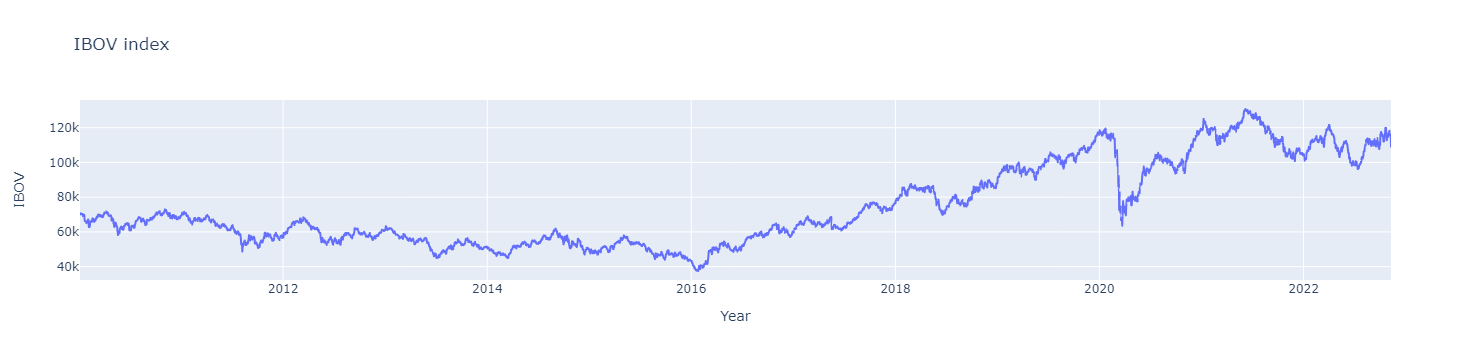

In [34]:
fig = px.line(data_frame=y, y=y, title= "IBOV index")
fig.update_layout(yaxis_title= "IBOV", xaxis_title= "Year")
fig.show()

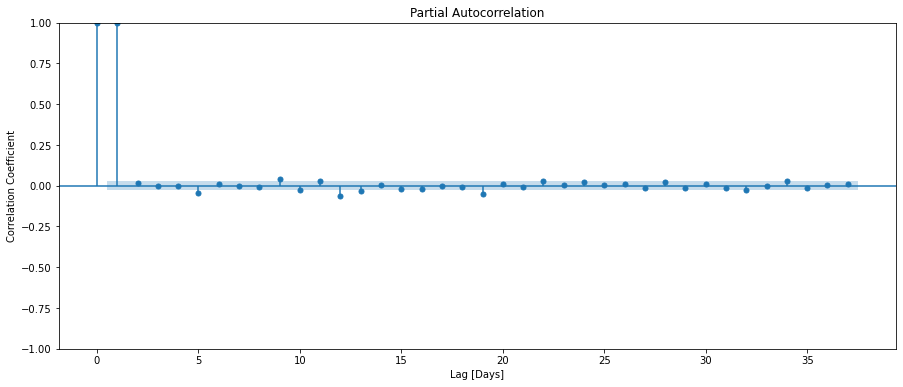

In [16]:
fig, ax = plt.subplots(figsize=(15, 6))
plot_pacf(y, ax=ax)
plt.xlabel("Lag [Days]")
plt.ylabel("Correlation Coefficient");

The graph above shows that there is a possible good predictive power with 19 lags.

# Model Building

# Spliting the Data

In [17]:
cutoff_test = int(len(y)*0.90)

y_train = y.iloc[:cutoff_test]
y_test = y.iloc[cutoff_test:]

Setting 90% for train and 10 % for test.

# Defining Baseline

In [18]:
y_train_mean = y_train.mean()
y_pred_baseline = [y_train_mean] * len(y_train)
mae_baseline = mean_absolute_error(y_train, y_pred_baseline)

print("Mean of the IBOV:", round(y_train_mean, 2))
print("Baseline MAE:", round(mae_baseline, 2))

Mean of the IBOV: 70530.4
Baseline MAE: 17311.76


# AutoReg Model

### Creating the pipeline:

Testing Lags for AutoReg model:

In [19]:
# Create dictionary to store MAEs
mae_grid = dict()
p_params = range(1,19)
# Outer loop: Iterate through possible values for p
for p in p_params:
    mae_grid[p] = list()
    # Note start time
    start_time = time.time()
    # Train model
    model = AutoReg(y_train, lags=p).fit()
    # Calculate model training time
    elapsed_time = round(time.time() - start_time, 2)
    print(f"Trained AutoReg {p} in {elapsed_time} seconds.")
    # Generate in-sample (training) predictions
    y_pred = model.predict().dropna()
    # Calculate training MAE
    mae = mean_absolute_error(y_train[p:], y_pred)
    # Append MAE to list in dictionary
    mae_grid[p].append(mae)

Trained AutoReg 1 in 0.03 seconds.
Trained AutoReg 2 in 0.0 seconds.
Trained AutoReg 3 in 0.0 seconds.
Trained AutoReg 4 in 0.0 seconds.
Trained AutoReg 5 in 0.0 seconds.
Trained AutoReg 6 in 0.0 seconds.
Trained AutoReg 7 in 0.0 seconds.
Trained AutoReg 8 in 0.0 seconds.
Trained AutoReg 9 in 0.0 seconds.
Trained AutoReg 10 in 0.0 seconds.
Trained AutoReg 11 in 0.01 seconds.
Trained AutoReg 12 in 0.0 seconds.
Trained AutoReg 13 in 0.0 seconds.
Trained AutoReg 14 in 0.0 seconds.
Trained AutoReg 15 in 0.0 seconds.
Trained AutoReg 16 in 0.01 seconds.
Trained AutoReg 17 in 0.01 seconds.
Trained AutoReg 18 in 0.0 seconds.


In [20]:
mae_df = pd.DataFrame(mae_grid)
mae_df.round(4).style.background_gradient(axis=None)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,530.725800,537.014400,537.015900,536.940100,539.582100,539.646600,540.242300,541.444600,543.410600,544.092000,544.787500,553.824500,556.014200,556.016600,555.950600,556.616800,556.898500,557.360800


As the heatmap above shows, the best lag is 1.

In [21]:
model = AutoReg(y_train, lags=1).fit()

### Setting parameters:

In [22]:
y_pred = model.predict().dropna()
training_mae = mean_absolute_error(y_train[1:], y_pred)
print("Training MAE:", training_mae)

Training MAE: 530.7258424855853


### Walk foward validation:

In [26]:
%%capture

y_pred_wfv = pd.Series()
history = y_train.copy()
####
for i in range(len(y_test)):
    model = AutoReg(history, lags=1).fit()
    next_pred = model.forecast()
    y_pred_wfv = y_pred_wfv.append(next_pred)
    history = history.append(y_test[next_pred.index])

### Evaluating the model:

In [28]:
test_mae = mean_absolute_error(y_test, y_pred_wfv)
print("Test MAE (walk forward validation):", round(test_mae, 2))

Test MAE (walk forward validation): 799.48


# Prediction vs Real Graph

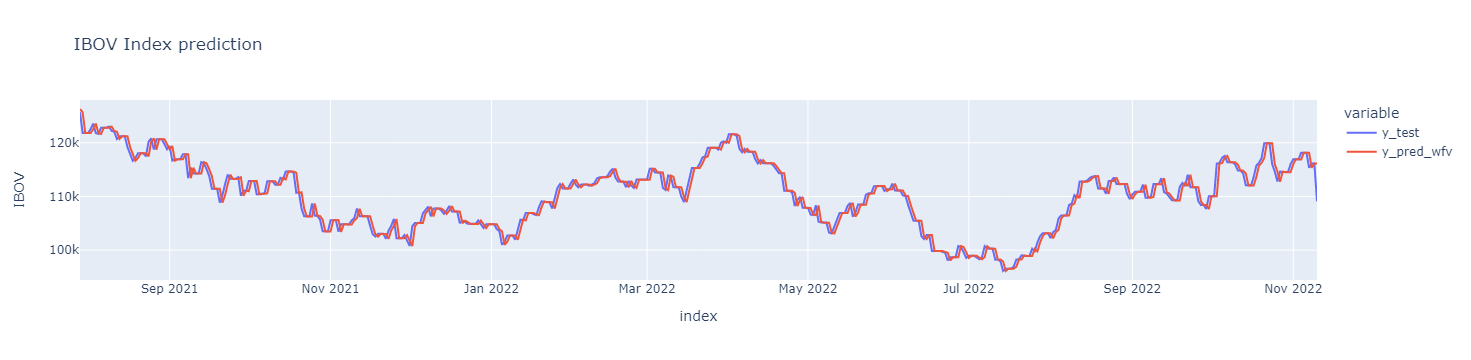

In [32]:
df_pred_test = pd.DataFrame(
    {"y_test": y_test, "y_pred_wfv": y_pred_wfv}
)
fig = px.line(df_pred_test, labels={"value":"IBOV"}, title= "IBOV Index prediction")
fig.show()

# Conclusion

The AutoReg model seems to do a great job predicting the IBOV index, beating baseline accuracy by a lot and predicting the index with just a little delay. 